In [245]:
import uproot
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from scipy.fft import fft, fftfreq
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import os
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline as pyo
import sys
from tqdm import tqdm

In [246]:
files =uproot.open(f"/Users/danielcarber/Documents/SBND/Noise Analysis/data/waveform_output_test.root")
files['tpc_noise;1'].keys()

['UB_plane', 'VB_plane', 'YB_plane', 'UA_plane', 'VA_plane', 'YA_plane']

In [247]:
raw_rms = files['tpc_noise;1']['YA_plane'].array().to_list()
print(len(raw_rms))

5682560


In [248]:
Waveform_df = {}
ch_id = 0
raw_rms = files['tpc_noise;1']['YA_plane'].array().to_list()
for r,rms in tqdm(enumerate(raw_rms)):
    if r%3415 == 0:
        Waveform_df[f'Channel_{ch_id}'] = []
        Waveform_df[f'Channel_{ch_id}'].append(rms)
        ch_id +=1
    else:
        Waveform_df[f'Channel_{ch_id-1}'].append(rms)
        



        
Waveform_df = pd.DataFrame(Waveform_df)

5682560it [00:01, 4239748.10it/s]


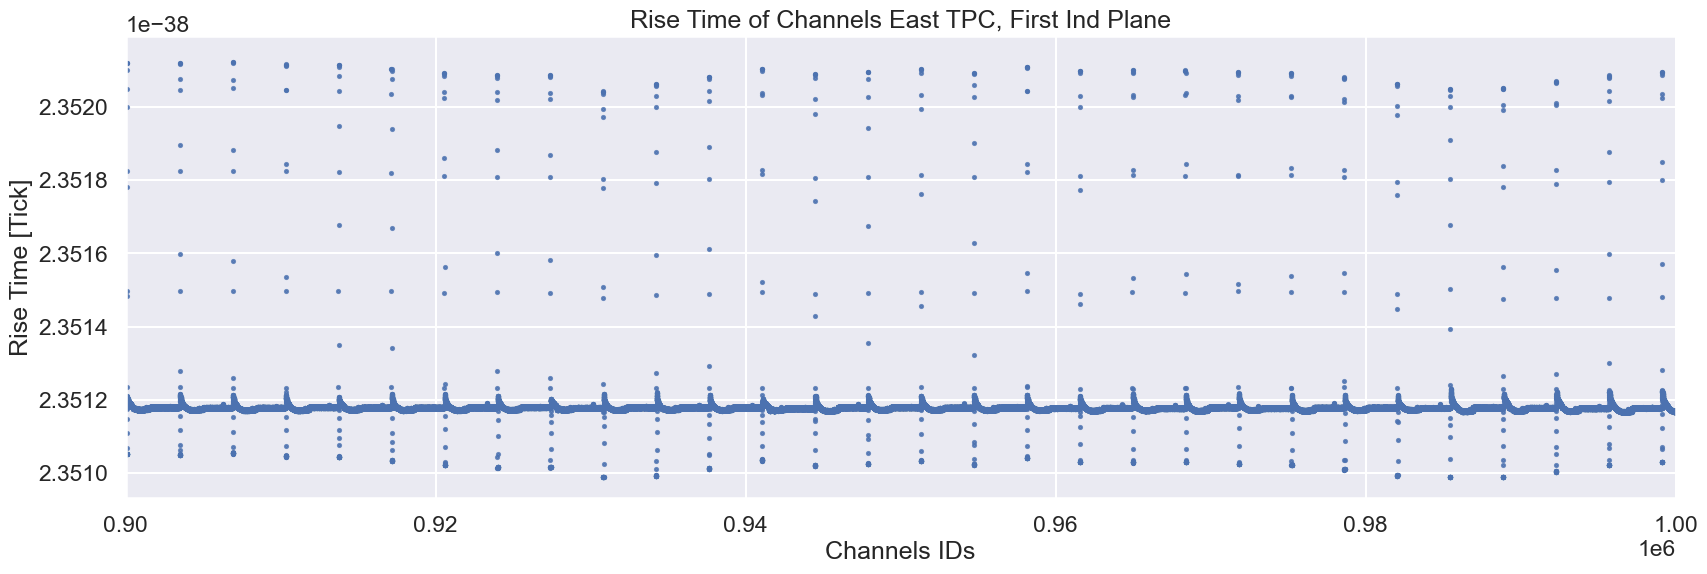

In [249]:
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
#print(np.median(Waveform_df['Channel_1'][:np.argmax(Waveform_df['Channel_1'])-20]))
#plt.plot(range(len(ADC_array[0][0])),ADC_array[0][4231])
#plt.hist(signal_diff_coll,range = [0,300],bins = 100, label = "Coll")
#plt.hist(signal_diff_ind_1,range = [0,300],bins = 100,alpha = .6, label = "Ind 1")
#plt.hist(signal_diff_ind_2,range = [0,300],bins = 100, alpha = .2,label = "Ind 2")
#plt.scatter(df['channel_id'],df['raw_rms'],alpha = 1, label = "RMS before shift",s = 10)
#plt.scatter(df_2['channel_id'],df_2['raw_rms'],alpha = 1, label = "RMS after shift",s = 10)
plt.scatter(range(len(raw_rms)),raw_rms ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")

#plt.hist(df['Time_diff'], range=[0, 2000],bins=50,alpha =1, label = "Time difference")
#plt.hist(selection['reco_dedx'][ep_mask_e], range=[0, 10], alpha = .4,bins=50,label = "Reco Electrons")
#plt.ylim(0,17.5)
plt.xlim(900000,1000000)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels IDs")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels East TPC, First Ind Plane")
plt.show()

In [229]:
channel = 60
files = []
Event = [186,606,735,745,835,1116,1377,1560,1592,1785]
for event in Event:
    files.append(f"/Users/danielcarber/Documents/SBND/Noise Analysis/data/waveform_output_{event}.root")

#print(np.median(Waveform_df['Channel_1'][:np.argmax(Waveform_df['Channel_1'])-20]))
fig = make_subplots(rows=1,cols=1)
for f in range(len(files)):
    Waveform_df = {}
    ch_id = 0
    file = uproot.open(files[f])
    raw_rms = file['tpc_noise;1']['UB_plane'].array().to_list()
    for r,rms in tqdm(enumerate(raw_rms)):
        if r%3415 == 0:
            Waveform_df[f'Channel_{ch_id}'] = []
            Waveform_df[f'Channel_{ch_id}'].append(rms)
            ch_id +=1
        else:
            Waveform_df[f'Channel_{ch_id-1}'].append(rms)
    Waveform_df = pd.DataFrame(Waveform_df)
    pulse = Waveform_df[f'Channel_{channel}'][np.argmax(Waveform_df[f'Channel_{channel}'])-150:np.argmax(Waveform_df[f'Channel_{channel}'])+150]
    #plt.scatter(range(300),Waveform_df[f'Channel_650'][np.argmax(Waveform_df['Channel_650'])-150:np.argmax(Waveform_df['Channel_650'])+150] ,alpha = .8,s = 5, label = f"Event {Event[f]}")
    fig.add_trace(go.Scatter(x=list(range(300)),y =pulse,name=f"{Event[f]}",mode = 'markers+lines'),row=1,col=1)
fig.update_layout(height = 800, width = 1200,showlegend = True)
fig.update_layout(
    title=f"Channel {channel} on First Induction West TPC",
    xaxis_title="Time [Tick]",
    yaxis_title="ADC",
    legend_title="Event #",)
#plt.ylim(-100,5000)
#plt.xlim(np.argmax(Waveform_df['Channel_1'])-100,np.argmax(Waveform_df['Channel_1'])+100)
#plt.yscale("log")
#plt.legend(loc = "upper right")
#plt.xlabel("Time [Ticks]")
#plt.ylabel("ADC")
#plt.title("Example Waveform Channel 873")
#plt.show()
fig.show()

6775360it [00:01, 4444645.96it/s]
6775360it [00:01, 4443115.75it/s]
6775360it [00:01, 4447648.28it/s]
6775360it [00:01, 4269527.50it/s]
6775360it [00:01, 4294756.02it/s]
6775360it [00:01, 4400547.86it/s]
6775360it [00:01, 4394991.69it/s]
6775360it [00:01, 4368390.09it/s]
6775360it [00:01, 4445652.08it/s]
6775360it [00:01, 4343574.63it/s]


In [161]:
rise_time = []
for i in range(ch_id):
    waveform = Waveform_df[f'Channel_{i}']
    median = np.median(waveform[:np.argmax(waveform)-50])
    #print(median)
    i = np.argmax(waveform)
    #print(waveform[i])
    while waveform[i]>=median:
        i-=1
        #print(i)
    rise_time.append(np.argmax(waveform)-i)
    

2057.0


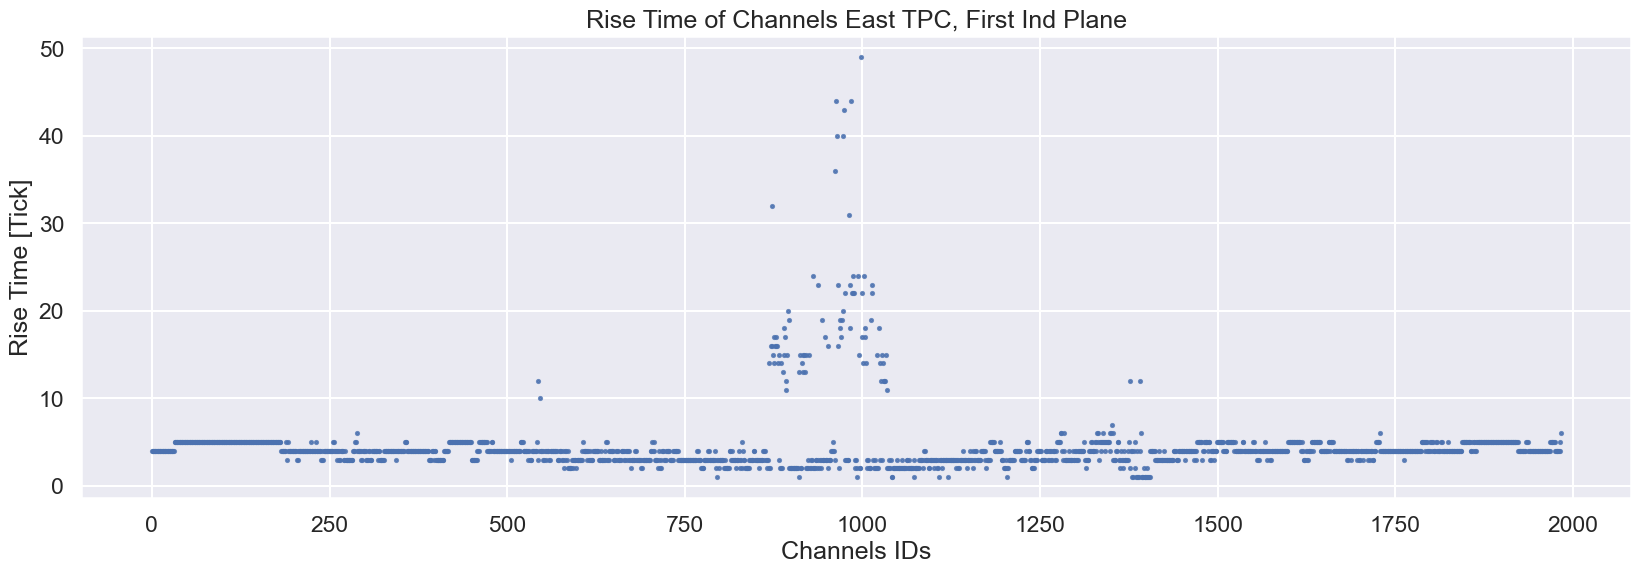

In [162]:
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
print(np.median(Waveform_df['Channel_1'][:np.argmax(Waveform_df['Channel_1'])-20]))
#plt.plot(range(len(ADC_array[0][0])),ADC_array[0][4231])
#plt.hist(signal_diff_coll,range = [0,300],bins = 100, label = "Coll")
#plt.hist(signal_diff_ind_1,range = [0,300],bins = 100,alpha = .6, label = "Ind 1")
#plt.hist(signal_diff_ind_2,range = [0,300],bins = 100, alpha = .2,label = "Ind 2")
#plt.scatter(df['channel_id'],df['raw_rms'],alpha = 1, label = "RMS before shift",s = 10)
#plt.scatter(df_2['channel_id'],df_2['raw_rms'],alpha = 1, label = "RMS after shift",s = 10)
plt.scatter(range(len(rise_time)),rise_time ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")

#plt.hist(df['Time_diff'], range=[0, 2000],bins=50,alpha =1, label = "Time difference")
#plt.hist(selection['reco_dedx'][ep_mask_e], range=[0, 10], alpha = .4,bins=50,label = "Reco Electrons")
#plt.ylim(0,17.5)
#plt.xlim(np.argmax(Waveform_df['Channel_1'])-100,np.argmax(Waveform_df['Channel_1'])+100)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels IDs")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels East TPC, First Ind Plane")
plt.show()

6775360it [00:01, 4058786.09it/s]


3968


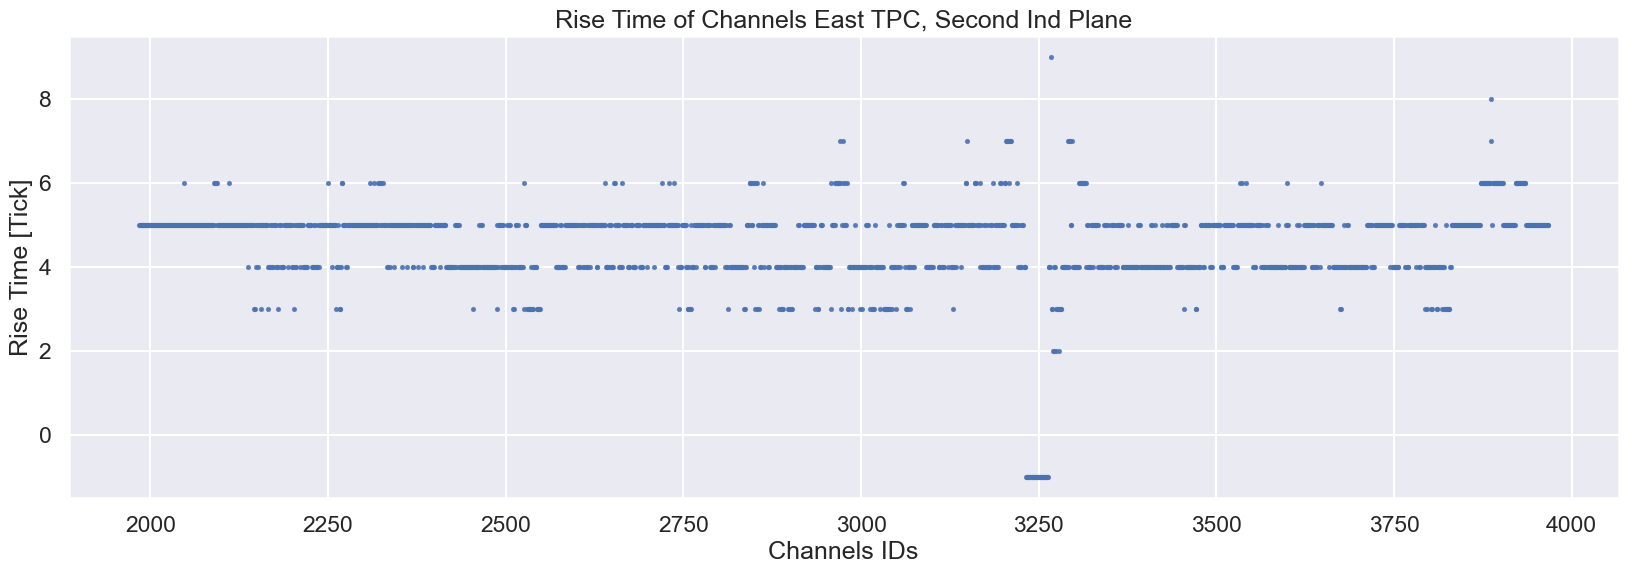

In [129]:
Waveform_df = {}
ch_id = 1984
raw_rms = files['tpc_noise;1']['VB_plane'].array().to_list()
for r,rms in tqdm(enumerate(raw_rms)):
    if r%3415 == 0:
        Waveform_df[f'Channel_{ch_id}'] = []
        Waveform_df[f'Channel_{ch_id}'].append(rms)
        ch_id +=1
    else:
        Waveform_df[f'Channel_{ch_id-1}'].append(rms)
    
Waveform_df = pd.DataFrame(Waveform_df)
rise_time = []
for k in range(1984,ch_id):
    waveform = Waveform_df[f'Channel_{k}']
    median = np.median(waveform[:np.argmax(waveform)-50])
    #print(k)
    i = np.argmax(waveform)
    #print(waveform[i])
    if i == 0:
        rise_time.append(-1)
        continue
    while waveform[i]>=median:
        i-=1
        if i == 0:
            rise_time.append(-1)
            continue
        #print(i)
    rise_time.append(np.argmax(waveform)-i)
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
print(ch_id)

plt.scatter(range(1984,ch_id,1),rise_time ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")
#plt.legend(loc = "upper right")

plt.xlabel("Channels IDs")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels East TPC, Second Ind Plane")
plt.show()

5682560it [00:01, 4020818.74it/s]


1664
5632


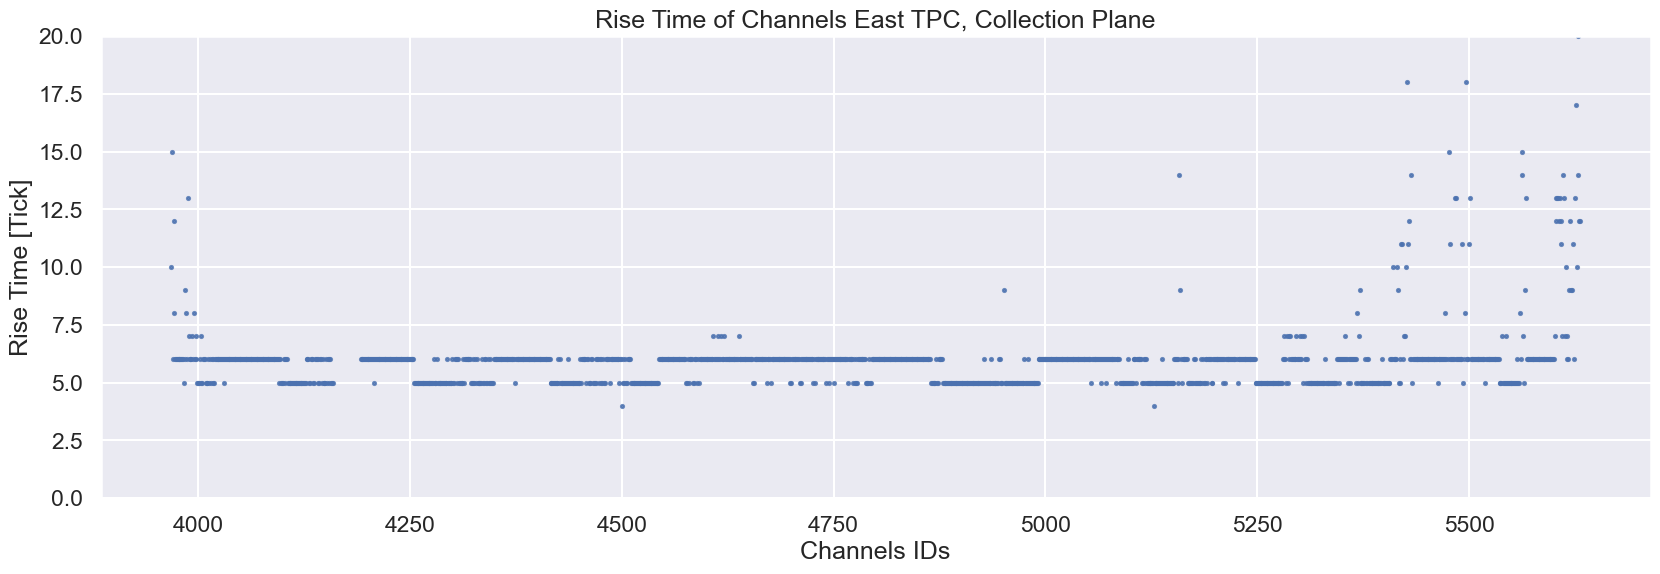

In [130]:
Waveform_df = {}
ch_id = 3968
raw_rms = files['tpc_noise;1']['YB_plane'].array().to_list()
for r,rms in tqdm(enumerate(raw_rms)):
    if r%3415 == 0:
        Waveform_df[f'Channel_{ch_id}'] = []
        Waveform_df[f'Channel_{ch_id}'].append(rms)
        ch_id +=1
    else:
        Waveform_df[f'Channel_{ch_id-1}'].append(rms)
    
Waveform_df = pd.DataFrame(Waveform_df)
print(len(Waveform_df.keys()))
rise_time = []
for k in range(3968,ch_id,1):
    waveform = Waveform_df[f'Channel_{k}']
    median = np.median(waveform[:np.argmax(waveform)-50])
    #print(k)
    i = np.argmax(waveform)
    #print(waveform[i])
    if i == 0:
        rise_time.append(-1)
        continue
    while waveform[i]>=median:
        i-=1
        if i == 0:
            rise_time.append(-1)
            continue
        #print(i)
    rise_time.append(np.argmax(waveform)-i)
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
#print(np.median(Waveform_df['Channel_1'][:np.argmax(Waveform_df['Channel_1'])-20]))
print(ch_id)
plt.scatter(range(3968,ch_id,1),rise_time ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")
#plt.legend(loc = "upper right")
plt.ylim(0,20)
plt.xlabel("Channels IDs")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels East TPC, Collection Plane")
plt.show()

6775360it [00:01, 3991612.72it/s]


3807.0
3801.0
3815.0
3809.0
3787.0
3813.0
3798.0
3786.0
3788.0
3809.0
3812.0
3800.0
3817.0
3805.0
3793.0
3814.0
3789.0
3776.0
3791.0
3814.0
3793.0
3791.0
3793.0
3816.0
3787.0
3813.0
3804.0
3805.0
3823.0
3784.0
3816.0
3828.0
3816.0
3801.0
3798.0
3832.0
3804.0
3810.0
3814.0
3821.0
3812.0
3806.0
3804.0
3808.0
3819.0
3816.0
3802.0
3823.0
3773.0
3778.0
3809.0
3822.0
3807.0
3806.0
3821.0
3837.0
3809.0
3789.0
3803.0
3794.0
3817.0
3835.0
3847.0
3821.0
3811.0
3806.0
3799.0
3805.0
3797.0
3775.0
3800.0
3820.0
3790.0
3770.0
3782.0
3832.0
3803.0
3765.0
3821.0
3784.0
3817.0
3802.0
3797.0
3823.0
3807.0
3810.0
3807.0
3804.0
3779.0
3792.0
3831.0
3786.0
3824.0
3815.0
3809.0
3779.0
3799.0
3748.0
3795.0
3791.0
3805.0
3792.0
3796.0
3780.0
3809.0
3800.0
3781.0
3790.0
3787.0
3781.0
3785.0
3780.0
3784.0
3809.0
3776.0
3767.0
3786.0
3819.0
3791.0
3789.0
3788.0
3782.0
3783.0
3766.0
3783.0
3781.0
3754.0
3808.0
3821.0
3810.0
3799.0
3791.0
3828.0
3810.0
3790.0
3822.0
3831.0
3777.0
3783.0
3814.0
3801.0
3825.0
3803.0

3838.0
3819.0
3795.0
3814.0
3825.0
3830.0
3833.0
3772.0
3844.0
3836.0
3827.0
3841.0
3818.0
3817.0
3714.0
3737.0
3752.0
3763.0
3728.0
3775.0
3772.0
3756.0
3761.0
3732.0
3755.0
3750.0
3781.0
3736.0
3730.0
3736.0
3746.0
3810.0
3742.0
3755.0
3753.0
3770.0
3754.0
3765.0
3743.0
3772.0
3742.0
3777.0
3736.0
3755.0
3766.0
3740.0
3795.0
3766.0
3777.0
3792.0
3802.0
3787.0
3797.0
3791.0
3795.0
3793.0
3792.0
3806.0
3780.0
3784.0
3799.0
3798.0
3802.0
3801.0
3813.0
3823.0
3836.0
3816.0
3834.0
3825.0
3850.0
3835.0
3807.0
3809.0
3825.0
3837.0
3820.0
3821.0
3785.0
3791.0
3777.0
3777.0
3771.0
3783.0
3797.0
3765.0
3765.0
3797.0
3789.0
3789.0
3815.0
3798.0
3768.0
3749.0
3819.0
3831.0
3789.0
3809.0
3807.0
3815.0
3811.0
3822.0
3812.0
3795.0
3815.0
3826.0
3839.0
3793.0
3798.0
3832.0
3777.0
3784.0
3759.0
3765.0
3746.0
3772.0
3784.0
3758.0
3760.0
3767.0
3764.0
3765.0
3757.0
3732.0
3768.0
3772.0
3760.0
3746.0
3757.0
3757.0
3751.0
3746.0
3767.0
3757.0
3756.0
3751.0
3750.0
3771.0
3728.0
3729.0
3738.0
3764.0
3812.0

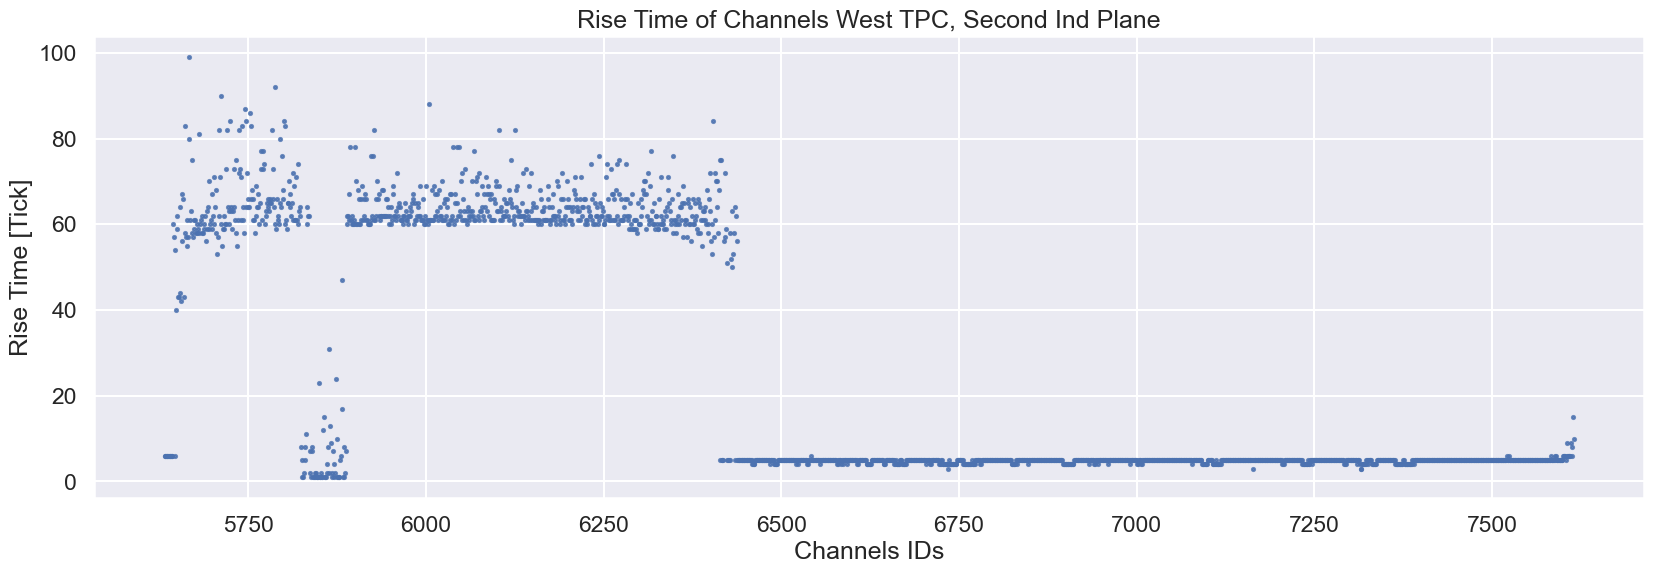

In [131]:
Waveform_df = {}
ch_id = 5632
raw_rms = files['tpc_noise;1']['UA_plane'].array().to_list()
for r,rms in tqdm(enumerate(raw_rms)):
    if r%3415 == 0:
        Waveform_df[f'Channel_{ch_id}'] = []
        Waveform_df[f'Channel_{ch_id}'].append(rms)
        ch_id +=1
    else:
        Waveform_df[f'Channel_{ch_id-1}'].append(rms)
    
Waveform_df = pd.DataFrame(Waveform_df)
rise_time = []
for k in range(5632,ch_id,1):
    waveform = Waveform_df[f'Channel_{k}']
    median = np.median(waveform[:np.argmax(waveform)-50])
    #print(k)
    i = np.argmax(waveform)
    print(waveform[i])
    if i <= 0:
        rise_time.append(-1)
        continue
    while waveform[i]>=median:
        i-=1
        if i <= 0:
            rise_time.append(-1)
            continue
        #print(i)
    rise_time.append(np.argmax(waveform)-i)
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
print(ch_id)

plt.scatter(range(5632,ch_id,1),rise_time ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")
#plt.legend(loc = "upper right")
plt.xlabel("Channels IDs")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels West TPC, First Ind Plane")
plt.show()

6775360it [00:01, 3981474.78it/s]


9600


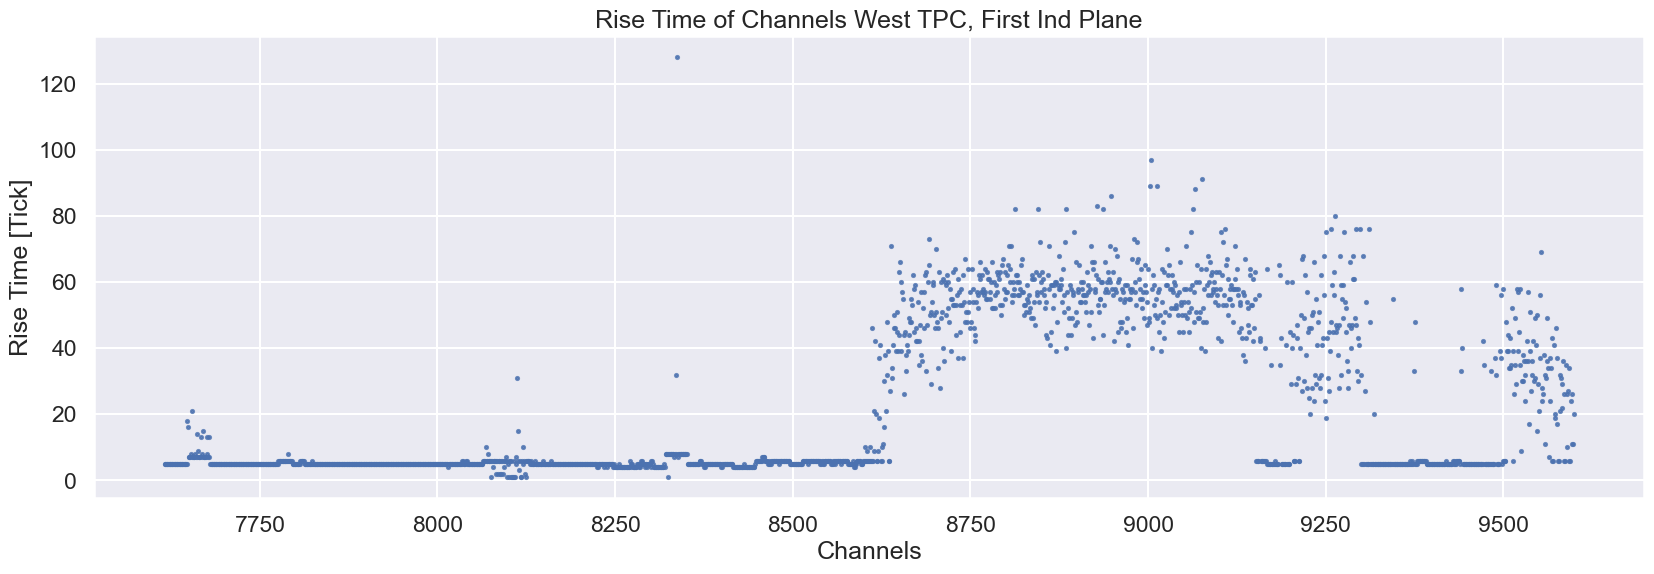

In [132]:
Waveform_df = {}
ch_id = 7616
raw_rms = files['tpc_noise;1']['VA_plane'].array().to_list()
for r,rms in tqdm(enumerate(raw_rms)):
    if r%3415 == 0:
        Waveform_df[f'Channel_{ch_id}'] = []
        Waveform_df[f'Channel_{ch_id}'].append(rms)
        ch_id +=1
    else:
        Waveform_df[f'Channel_{ch_id-1}'].append(rms)
    
Waveform_df = pd.DataFrame(Waveform_df)
rise_time = []
for k in range(7616,ch_id,1):
    waveform = Waveform_df[f'Channel_{k}']
    median = np.median(waveform[:np.argmax(waveform)-50])
    #print(k)
    i = np.argmax(waveform)
    #print(waveform[i])
    if i == 0:
        rise_time.append(-1)
        continue
    while waveform[i]>=median:
        i-=1
        if i == 0:
            rise_time.append(-1)
            continue
        #print(i)
    rise_time.append(np.argmax(waveform)-i)
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
print(ch_id)

plt.scatter(range(7616,ch_id,1),rise_time ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels West TPC, First Ind Plane")
plt.show()

In [133]:
Waveform_df = {}
ch_id = 9600
raw_rms = files['tpc_noise;1']['YA_plane'].array().to_list()
for r,rms in tqdm(enumerate(raw_rms)):
    if r%3415 == 0:
        Waveform_df[f'Channel_{ch_id}'] = []
        Waveform_df[f'Channel_{ch_id}'].append(rms)
        ch_id +=1
    else:
        Waveform_df[f'Channel_{ch_id-1}'].append(rms)
    
Waveform_df = pd.DataFrame(Waveform_df)
rise_time = []
for k in range(9600,ch_id,1):
    waveform = Waveform_df[f'Channel_{k}']
    median = np.median(waveform[:np.argmax(waveform)-50])
    #print(k)
    i = np.argmax(waveform)
    #print(waveform[i])
    if i == 0:
        break
    while waveform[i]>=median:
        i-=1
        if i == 0:
            break
        #print(i)
    rise_time.append(np.argmax(waveform)-i)
seaborn.set(rc={
    'figure.figsize':(20, 6),
})
seaborn.set_context('talk')
print(ch_id)

plt.scatter(range(9600,ch_id,1),rise_time ,alpha = .8,s = 5, label = "RMS of Channels w/ signals")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("Rise Time [Tick]")
plt.title("Rise Time of Channels UB Plane")
plt.show()

582467it [00:00, 3726259.31it/s]


ValueError: All arrays must be of the same length